In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

In [2]:
data = pd.read_csv("cleaned.csv")
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,0


In [3]:
# https://www.kaggle.com/katacs/data-cleaning-and-random-forest -- reference

In [4]:
#fill remaining null with 0 as well
data['v2a1']=data['v2a1'].fillna(0)

In [5]:
#fill remaining null with 0 as well
data['rez_esc']=data['rez_esc'].fillna(0)

# Feature Engineering
https://www.kaggle.com/willkoehrsen/a-complete-introduction-and-walkthrough

Individual Variables: these are characteristics of each individual rather than the household  
    1.  Boolean: Yes or No (0 or 1)  
    2.  Ordered Discrete: Integers with an ordering  
Household variables  
    1.  Boolean: Yes or No
    2.  Ordered Discrete: Integers with an ordering
    3.  Continuous numeric
Squared Variables: derived from squaring variables in the data  
Id variables: identifies the data and should not be used as features

Below we manually define the variables in each category. This is a little tedious, but also necessary.

In [6]:
id_ = ['Id', 'idhogar', 'Target']

In [7]:
#Individual Level Features
indv_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone']

indv_ordered = ['rez_esc', 'escolari', 'age']

In [8]:
#Household level features
hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2']

hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']

In [9]:
#Squared
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

#### Removing squared features  
As they are highly correlated with non-sqaured features, and hence are redundant, therefore will be removing them 

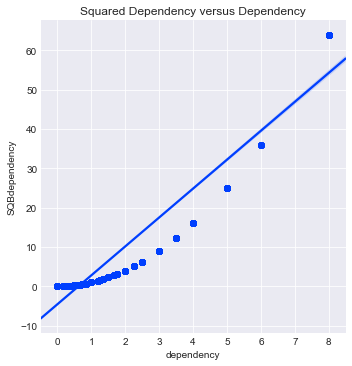

In [10]:
sns.set_style("darkgrid")
sns.set_palette(palette = 'bright')
sns.lmplot('dependency', 'SQBdependency', data = data, fit_reg=True);
plt.title('Squared Dependency versus Dependency');
plt.grid(True)

highly correlated, remove them from dataset

In [11]:
#remove squared variables
data = data.drop(columns = sqr_)
data.shape

(9557, 134)

#### Id varibales are required for indentifying each row, so therefore are kept in the dataset

# Household Level Variables

In [12]:
#get the data for head of household
heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(2973, 98)

#### Remove redundant household variable
Find variables having correlation with variables  > 0.95

In [13]:
#correlation matrix for household level variables
corr_matrix = heads.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]
to_drop

['coopele', 'area2', 'tamhog', 'hhsize', 'hogar_total']

'coopele' : electricity from cooperative  
'area2' : zona rural  
'tamhog' : size of the household  
'hhsize' : household size   
'hogar_total' : # of total individuals in the household  

#### This shows one of the highly correlated pair, to find the other one 

In [14]:
#check with 'tamhog' : size of household
corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9]

,r4t3,tamhog,tamviv,hhsize,hogar_total
r4t3,1.000000,0.996884,0.929237,0.996884,0.996884
tamhog,0.996884,1.000000,0.926667,1.000000,1.000000
tamviv,0.929237,0.926667,1.000000,0.926667,0.926667
hhsize,0.996884,1.000000,0.926667,1.000000,1.000000
hogar_total,0.996884,1.000000,0.926667,1.000000,1.000000


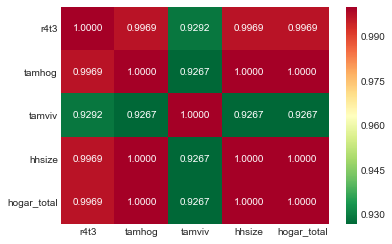

In [15]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.RdYlGn_r, fmt='.4f');

There are several variables that are related with the size of the house  

r4t3: Total persons in the household  
tamhog: size of the household  
tamviv: number of persons living in the household   
hhsize: household size   
hogar_total: # of total individuals in the household  

Analysis
    1. 'hhsize' has correlation of 1 wih 'tamhog' and 'hogar_total', therefore removed (tamhog and hogar_total)
    2. 'r4t3' has near perfect correlation with 'hhsize', therefore removed (r4t23)
    3. 'tamviv' and 'hhize' might not be same, as there might be family members that are not living in the house, hence did not remove

In [16]:
#drop the columns 
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

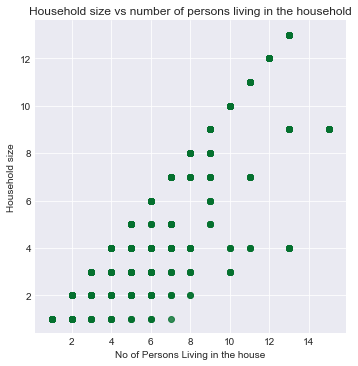

In [17]:
#plot 
sns.set_palette(palette = 'Greens_r')
sns.lmplot('tamviv', 'hhsize', data, fit_reg=False, size = 5);
plt.xlabel("No of Persons Living in the house")
plt.ylabel("Household size")
plt.title('Household size vs number of persons living in the household');

In the above plot, there are few instances where the tamviv is greater than hhsize,    
hence will create a new feature that will be a difference of tamviv and hhsize

In [18]:
heads['hhsize_diff'] = heads['tamviv'] - heads['hhsize']

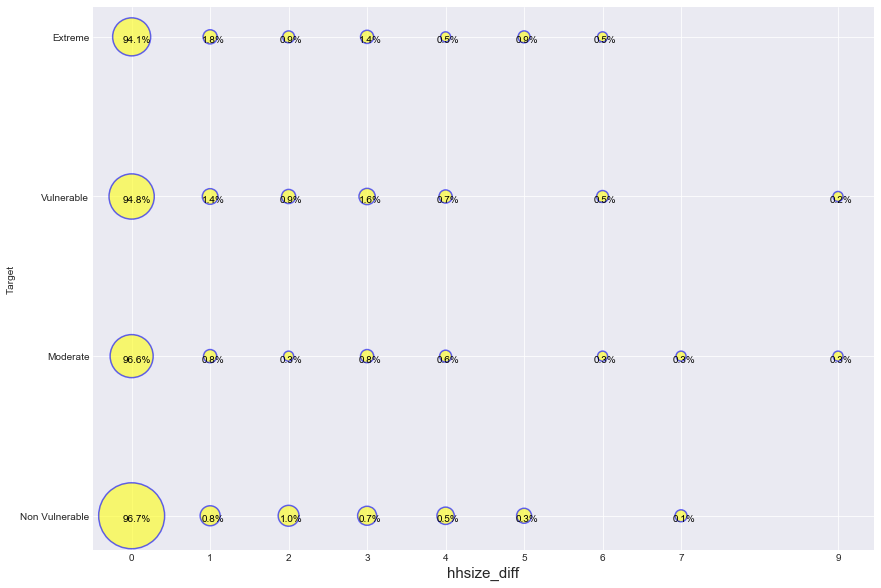

In [19]:
#REFERENCE:     https://python-graph-gallery.com/271-custom-your-bubble-plot/
def plot_bubblePlot(x,y, color, train):
    
    #group data based on Target variable
    data_unnormalized  = train.groupby(y)[x].value_counts(normalize = False)
    data_unnormalized = data_unnormalized.rename(columns = {x: 'raw_count'}).reset_index()

    #nomrmalized the data based on Target
    data_normalized = train.groupby(y)[x].value_counts(normalize = True)
    data_normalized = data_normalized.rename(columns = {x: 'normalized_values'}).reset_index()
    data_normalized['percentage'] = 100 * data_normalized[0]
    data_normalized['raw_count'] = list(data_unnormalized[0])

    plt.figure(figsize = (14, 10))
       

    # Scatter plot sized by percent
    plt.scatter(data_normalized[x], data_normalized[y], edgecolor = 'b',color = color,
                    s = 100 * np.sqrt(data_normalized['raw_count']), marker = 'o',
                    alpha = 0.6, linewidth = 1.5);


    #adjust x and y ticks 
    plt.yticks(data_normalized[y].unique())
    plt.yticks([0,1,2,3], label)
    plt.xticks(data_normalized[x].unique())
    
    
    if True:
        #annotate the graph
        for i, row in data_normalized.iterrows():
                # setting offsets
                plt.annotate(xy= (row[x] - (1 / data_normalized[x].nunique()), 
                                   row[y] - (0.15 / data_normalized[y].nunique())),
                             color = 'black',
                             s = f"{round(row['percentage'], 1)}%")

label = ['Non Vulnerable', 'Moderate', 'Vulnerable', 'Extreme']
plot_bubblePlot('hhsize_diff', 'Target', 'xkcd:yellow', heads)
plt.ylabel("Target")
plt.xlabel("hhsize_diff", fontsize = 15);


Few household that have more people living in the household than than the household size

In [20]:
#check with 'coopele' : electricity from cooperative  
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs() > 0.9]

,public,coopele
public,1.000000,-0.974788
coopele,-0.974788,1.000000


#### 'public' "=1 electricity from CNFL,  ICE,  ESPH/JASEC".  
This indicates where electricity is coming from.   
There are four options, and the families that don't have one of these two options either have no electricity (noelec) or get it from a private plant (planpri).


#### Creating Ordinal Variable - for electricity
values based on domain knowledge  
0: No electricity  
1: Electricity from cooperative  
2: Electricity from CNFL, ICA, ESPH/JASEC  
3: Electricity from private plant  
    
After creating ordinal variable for electricity, drop the other 4 variable

In [21]:
elec = []

# Assign values
for i, row in heads.iterrows():
    if row['noelec'] == 1:
        elec.append(0)
    elif row['coopele'] == 1:
        elec.append(1)
    elif row['public'] == 1:
        elec.append(2)
    elif row['planpri'] == 1:
        elec.append(3)
    else:
        elec.append(np.nan)
        
# Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

# Remove the electricity columns

heads = heads.drop(columns = ['noelec', 'coopele', 'public', 'planpri'])

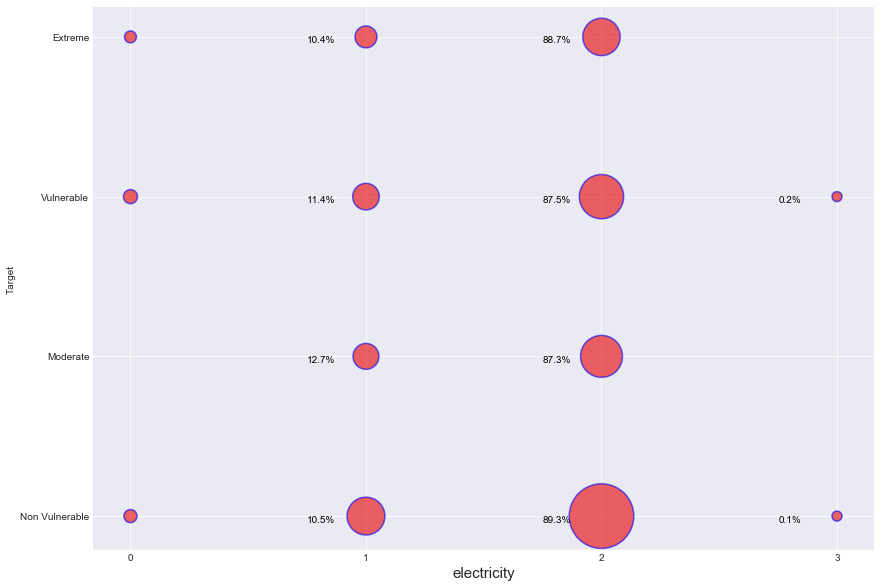

In [22]:
label = ['Non Vulnerable', 'Moderate', 'Vulnerable', 'Extreme']
plot_bubblePlot('elec', 'Target', 'xkcd:red', heads)
plt.ylabel("Target")
plt.xlabel("electricity", fontsize = 15);


most of the household get electricity from source 2 

In [23]:
#check with 'area2' : zona rural    
corr_matrix.loc[corr_matrix['area2'].abs() > 0.9, corr_matrix['area2'].abs() > 0.9]

,area1,area2
area1,1.0,-1.0
area2,-1.0,1.0


Area1 is redundant because there is column indicating if the house is in a urban zone (area1)  
Therefore, dropped  area1.

In [24]:
#drop area2: rular zone
heads = heads.drop(columns = 'area2')

In [25]:
heads.groupby('area1')['Target'].value_counts(normalize = True)

area1  Target
0      0         0.582249
       2         0.176331
       1         0.147929
       3         0.093491
1      0         0.687030
       2         0.137688
       1         0.108083
       3         0.067199
Name: Target, dtype: float64

Households in ubran area = 1, have lesser poverty levels than the household in Rular areas = 0

#### Create Ordinal Variables for Walls Quality
    1. epared1 = 1: walls are bad 
    2. epared2 = 1: walls are regular
    3. epared3 = 1: walls are good
#### For creating ordinal variable for walls, used this terminology, bad < regular < good --> 0<1<2

In [26]:
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),axis = 1)

In [27]:
# drop epared1,epared2,epared3 columns
heads = heads.drop(columns = ['epared1', 'epared2', 'epared3'])

#### Create Ordinal Variables for Roof Quality
    1. etecho1 = 1: Roofs are bad 
    2. etecho2 = 1: Roofs are regular
    3. etecho3 = 1: Roofs are good
#### For creating ordinal variable for Roof, used this terminology, bad < regular < good --> 0<1<2

In [28]:
heads['roofs'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),axis = 1)

In [29]:
#drop 'etecho1', 'etecho2', 'etecho3' columns
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

#### Create Ordinal Variables for Floor Quality
    1. eviv1 = 1: floor are bad 
    2. eviv1 = 1: floor are regular
    3. eviv1 = 1: floor are good
#### For creating ordinal variable for floor, used this terminology, bad < regular < good --> 0<1<2

In [30]:
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),axis = 1)

In [31]:
#drop 'eviv1', 'eviv2', 'eviv3' columns
heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])

### Feature Construction

We will add the ordinal variable created above (walls+roofs+floors) to get the overall quality of the house

In [32]:
heads['walls+roofs+floor'] = heads['walls'] + heads['roofs'] + heads['floor']

In [33]:
#plotting
# X = heads[["walls+roofs+floor", "Target"]].groupby(["walls+roofs+floor", "Target"])
# temp = X['Target'].agg('count').unstack('Target')

In [34]:
#normalized plotting
counts = pd.DataFrame(heads.groupby(['walls+roofs+floor'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized_Count'}).reset_index()

In [35]:
counts.head()

,walls+roofs+floor,Target,Normalized_Count
0,0,0,0.376404
1,0,2,0.320225
2,0,3,0.162921
3,0,1,0.140449
4,1,0,0.323529


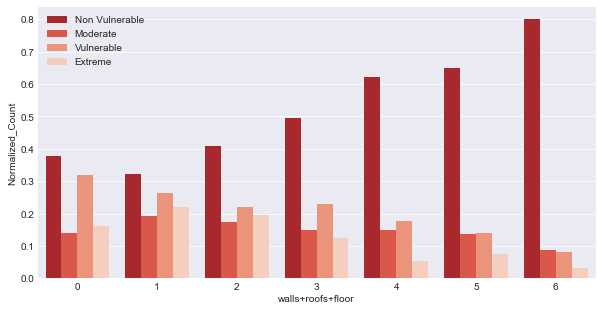

In [36]:
plt.figure(figsize = (10,5))
ax = sns.barplot(x="walls+roofs+floor", y="Normalized_Count", hue="Target", data=counts, palette = "Reds_r");
handles,_ = ax.get_legend_handles_labels()
plt.legend(handles, label);

#### Created new variable "warning" indicating houeholds having No toilet, no electricity, no floor, no water service, no ceiling

In [37]:
heads['warning'] = 1 * (heads['sanitario1'] + 
                         (heads['elec'] == 0) + 
                         heads['pisonotiene'] + 
                         heads['abastaguano'] + 
                         (heads['cielorazo'] == 0))

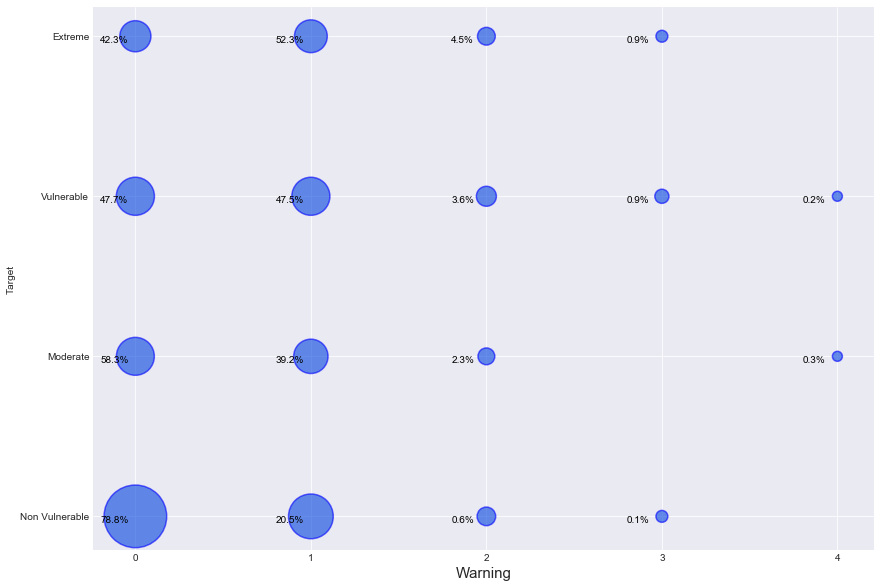

In [38]:
label = ['Non Vulnerable', 'Moderate', 'Vulnerable', 'Extreme']
plot_bubblePlot('warning', 'Target', 'xkcd:blue', heads)
plt.ylabel("Target")
plt.xlabel("Warning", fontsize = 15);

78% of Households have no warnings and are not vulnerable to poverty

#### Created new variable "bonus" where a household get 1 points for having a refrigerator, computer, tablet, or television

In [39]:
heads['bonus'] = 1 * (heads['refrig'] + heads['computer'] + (heads['v18q1'] > 0) + heads['television'])

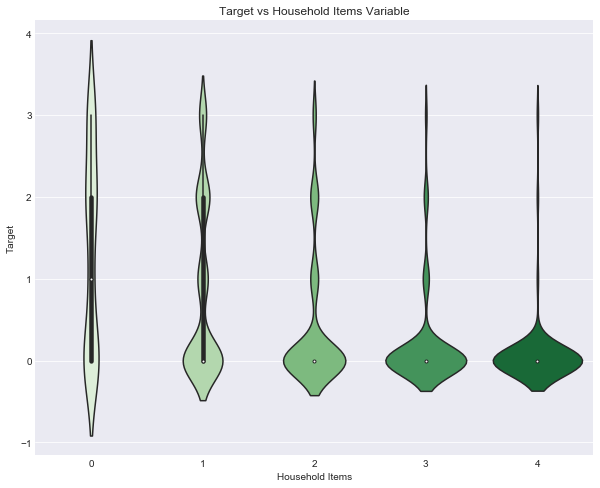

In [40]:
plt.figure(figsize = (10, 8))
sns.violinplot('bonus', 'Target', data = heads, palette = 'Greens');
plt.xlabel("Household Items")
plt.title('Target vs Household Items Variable');

### Per Capita Features  
qmobilephone: # of mobile phones  
v18q1:  # of tablets household owns  
rooms:  # of all rooms in the house  
v2a1: Monthly rent payment   
tamviv: # of persons living in the household   

In [41]:
heads['phones-per-capita'] = heads['qmobilephone'] / heads['tamviv']
heads['tablets-per-capita'] = heads['v18q1'] / heads['tamviv']
heads['rooms-per-capita'] = heads['rooms'] / heads['tamviv']
heads['rent-per-capita'] = heads['v2a1'] / heads['tamviv']

### Exploring Household Variables  
dependency' :  No of dependents    
'warning' :  No toilet, no electricity, no floor, no water service, no ceiling
'walls+roofs+floor': Quality of House  
'meaneduc' : average years of education for adults (18+)  
'floor' : Ordinal Variable, indicating  bad < regular < good  
'r4m1': Females younger than 12 years of age  
'overcrowding':  # persons per room  
'Target': Target value 0 -> Not poor, 3 -> Extreme Poor  


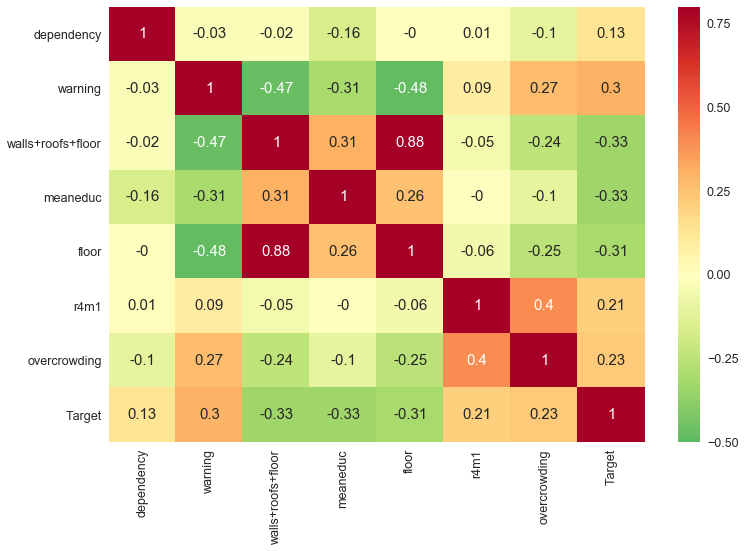

In [42]:
train_heads = heads.loc[heads['Target'].notnull(), :].copy()
variables = ['dependency', 'warning', 'walls+roofs+floor', 'meaneduc','floor', 'r4m1', 'overcrowding', 'Target']

# Calculate the correlations
corr_mat = train_heads[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
sns.set(font_scale = 1.25)
plt.figure(figsize = (12, 8))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);


### Spearman Correlation Coefficient  
The Spearman correlation coefficient calculation also comes with a pvalue indicating the significance level of the relationship. Any pvalue less than 0.05 is genearally regarded as significant,

In [43]:
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

feats = []
scorr = []
pvalues = []

# Iterate through each column
for c in heads:
    # Only valid for numbers
    if heads[c].dtype != 'object':
        feats.append(c)
        
        # Calculate spearman correlation
        scorr.append(spearmanr(train_heads[c], train_heads['Target']).correlation)
        pvalues.append(spearmanr(train_heads[c], train_heads['Target']).pvalue)

scorrs = pd.DataFrame({'feature': feats, 'scorr': [round(x,2) for x in scorr], 'pvalue': pvalues}).sort_values('scorr')

In [44]:
print('Most negative Spearman correlations:')
print(scorrs.head())
print('\nMost positive Spearman correlations:')
print(scorrs.dropna().tail())

#r4t1: persons younger than 12 years of age

Most negative Spearman correlations:
              feature  scorr         pvalue
60           meaneduc  -0.38  1.543739e-102
88  phones-per-capita  -0.34   4.760104e-80
85  walls+roofs+floor  -0.34   9.539346e-81
84              floor  -0.31   4.466091e-67
82              walls  -0.30   1.925370e-62

Most positive Spearman correlations:
       feature  scorr        pvalue
69        r4t1   0.22  1.112230e-33
74   hogar_nin   0.24  5.567218e-39
57  dependency   0.28  2.792620e-55
86     warning   0.31  4.682829e-66
0       Target   1.00  0.000000e+00


In [45]:
household_feats = list(heads.columns)

# Individual Level Variables

In [46]:
#get individual level variable
ind = data[id_ + indv_bool + indv_ordered]

In [47]:
ind.shape

(9557, 39)

### Redundant Individual Variables
Find the variables having correlation > 0.95

In [48]:
corr_matrix = ind.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

to_drop

['female']

This variable is opposite of male, so dropped

In [49]:
ind = ind.drop(columns = 'male')

### Creating Ordinal Variables

instlevel_ :  level of education of family members  
instlevel0: no education while instlevel9: postgraduate education   
Higher the education, better it is 

In [50]:
ind[[c for c in ind if c.startswith('instl')]].head()

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9
0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [51]:
ind['inst'] = np.argmax(np.array(ind[[c for c in ind if c.startswith('instl')]]), axis = 1)

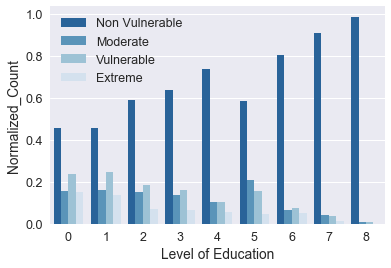

In [52]:
counts_inst = pd.DataFrame(ind.groupby(['inst'])['Target'].value_counts(normalize = True)).rename(columns = {'Target': 'Normalized_Count'}).reset_index()
ax = sns.barplot(x="inst", y="Normalized_Count", hue="Target", data=counts_inst, palette = "Blues_r");
handles,_ = ax.get_legend_handles_labels()
plt.xlabel("Level of Education")
plt.legend(handles, label);

In [53]:
#drop the columns
ind = ind.drop(columns = [c for c in ind if c.startswith('instlevel')])

### Feature Construction

In [54]:
#years of edu/age
ind['escolari/age'] = ind['escolari'] / ind['age']
#edu level/age
ind['inst/age'] = ind['inst'] / ind['age']
#comb of mobile phone and tablet
ind['tech'] = ind['v18q'] + ind['mobilephone']

# Feature Engineering through Aggregations
Aggregate individual to household

In [55]:
# Define custom function
range_ = lambda x: x.max() - x.min()
range_.__name__ = 'range_'

# Group and aggregate
ind_agg = ind.drop(columns = 'Target').groupby('idhogar').agg(['min', 'max', 'sum', 'count', 'std', range_])
ind_agg.head()

v18q                           dis                ...    inst/age  \
           min max sum count  std range_ min max sum count  ...         sum   
idhogar                                                     ...               
001ff74ca    1   1   2     2  0.0      0   0   0   0     2  ...    0.184211   
003123ec2    0   0   0     4  0.0      0   0   0   0     4  ...    0.213768   
006031de3    1   1   4     4  0.0      0   0   0   0     4  ...    0.589841   
006555fe2    0   0   0     5  0.0      0   0   1   1     5  ...    0.436813   
00693f597    0   0   0     4  0.0      0   0   0   0     4  ...    0.464251   

                                    tech                            
          count       std    range_  min max sum count  std range_  
idhogar                                                             
001ff74ca     1       NaN  0.000000    2   2   4     2  0.0      0  
003123ec2     4  0.064636  0.130435    1   1   4     4  0.0      0  
006031de3     4  0.048082  0.103535    2   2   8     4  0.0      0  
006555fe2     5  0.060452  0.136278    1   1   5     5  0.0      0  
00693f597     4  0.056008  0.114894    1   1   4     4  0.0      0  

[5 rows x 180 columns]

In [56]:
new_col = []
for c in ind_agg.columns.levels[0]:
    for stat in ind_agg.columns.levels[1]:
        new_col.append(f'{c}-{stat}')
        
ind_agg.columns = new_col
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-count,v18q-std,v18q-range_,dis-min,dis-max,dis-sum,dis-count,...,inst/age-sum,inst/age-count,inst/age-std,inst/age-range_,tech-min,tech-max,tech-sum,tech-count,tech-std,tech-range_
idhogar,,,,,,,,,,,,,,,,,,,,,
001ff74ca,1,1,2,2,0.0,0,0,0,0,2,...,0.184211,1,NaN,0.000000,2,2,4,2,0.0,0
003123ec2,0,0,0,4,0.0,0,0,0,0,4,...,0.213768,4,0.064636,0.130435,1,1,4,4,0.0,0
006031de3,1,1,4,4,0.0,0,0,0,0,4,...,0.589841,4,0.048082,0.103535,2,2,8,4,0.0,0
006555fe2,0,0,0,5,0.0,0,0,1,1,5,...,0.436813,5,0.060452,0.136278,1,1,5,5,0.0,0
00693f597,0,0,0,4,0.0,0,0,0,0,4,...,0.464251,4,0.056008,0.114894,1,1,4,4,0.0,0


In [57]:
ind_agg.iloc[:, [0, 1, 2, 3, 6, 7, 8, 9]].head()

,v18q-min,v18q-max,v18q-sum,v18q-count,dis-min,dis-max,dis-sum,dis-count
idhogar,,,,,,,,
001ff74ca,1,1,2,2,0,0,0,2
003123ec2,0,0,0,4,0,0,0,4
006031de3,1,1,4,4,0,0,0,4
006555fe2,0,0,0,5,0,1,1,5
00693f597,0,0,0,4,0,0,0,4


# Feature Selection


In [58]:
# Create correlation matrix
corr_matrix = ind_agg.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.95)]

print(f'There are {len(to_drop)} correlated columns to remove.')

There are 85 correlated columns to remove.


In [59]:
ind_agg = ind_agg.drop(columns = to_drop)
ind_agg.reset_index(inplace  = True)
final = heads.merge(ind_agg, on = 'idhogar', how = 'left')

In [60]:
print('Final features shape: ', final.shape)

Final features shape:  (2973, 189)


In [61]:
final.head()

,Id,idhogar,Target,hacdor,hacapo,v14a,refrig,paredblolad,paredzocalo,paredpreb,...,escolari/age-sum,escolari/age-std,escolari/age-range_,inst/age-max,inst/age-std,inst/age-range_,tech-min,tech-sum,tech-std,tech-range_
0,ID_279628684,21eb7fcc1,0,0,0,1,1,1,0,0,...,0.232558,NaN,0.000000,0.069767,NaN,0.000000,1,1,NaN,0
1,ID_f29eb3ddd,0e5d7a658,0,0,0,1,1,0,0,0,...,0.179104,NaN,0.000000,0.104478,NaN,0.000000,2,2,NaN,0
2,ID_68de51c94,2c7317ea8,0,0,0,1,1,0,0,0,...,0.119565,NaN,0.000000,0.043478,NaN,0.000000,0,0,NaN,0
3,ID_ec05b1a7b,2b58d945f,0,0,0,1,1,1,0,0,...,1.366183,0.126943,0.279412,0.176471,0.033010,0.071207,2,8,0.0,0
4,ID_1284f8aad,d6dae86b7,0,1,0,1,1,1,0,0,...,0.965584,0.168946,0.392857,0.142857,0.060063,0.142857,1,4,0.0,0


In [62]:
#Correlation Final Data
corrs = final.corr()['Target']
corrs.sort_values().head()

escolari-max        -0.373091
inst-max            -0.368229
meaneduc            -0.333593
walls+roofs+floor   -0.332446
floor               -0.307605
Name: Target, dtype: float64

In [63]:
corrs.sort_values().dropna().tail()

estadocivil1-sum    0.239130
r4t1                0.260917
hogar_nin           0.266309
warning             0.301791
Target              1.000000
Name: Target, dtype: float64

In [64]:
final.to_csv("final_cleaned.csv")